# Chapter 4: Solving Differential Equations

## Galactic collisions

Module ```galcol``` contains functions for setup, numerical integration, and visualization

In [13]:
import galcol

In [14]:
dir(galcol)

['Axes3D',
 'Circle',
 'FuncAnimation',
 'G',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__warningregistry__',
 'anim_disk_2d',
 'anim_disk_3d',
 'anim_orbits',
 'anim_two_disks_2d',
 'anim_two_disks_3d',
 'evolve_disk',
 'evolve_two_disks',
 'init_disk',
 'kpc',
 'np',
 'parameters',
 'plt',
 'show_disk_3d',
 'show_orbits',
 'show_orbits_3d',
 'show_two_disks_2d',
 'show_two_disks_3d',
 'unit']

#### Example: Whirlpool-like galaxy

This is an example for a nearly edge-on collision. A smaller intruder galaxy moves under an angle of 45° in the $xy$-plane with an impact velocity of about 130 km/s toward a larger, more massive target galaxy. The impact parameter is 6 kpc in $z$-direction.

First we define the parameters of the intruder and target galaxies.

In [15]:
import galcol
import astropy.units as unit

In [1]:
galaxies = {
    'intruder' : galcol.parameters(
        # mass in solar masses
        1e10, 
        # disk radius in kpc
        5, 
        # Cartesian coordinates (x,y,z) of initial position in kpc 
        (25,-25,-5), 
        # x-, y-, z-components of initial velocity in km/s
        (-75,75,0),
        # normal to galactic plane (disk is in xy-plane)
        (0,0,1), 
        # number of rings (each ring will be randomly populated with 1000/5 = 200 stars)
        5, 
        # total number of stars
        1000, 
        # softening factor defines inner edge of disk (in units of disk radius)
        0.025),
    'target' : galcol.parameters(5e10, 10, (-5,5,1), (15,-15,0), (1,-1,2**0.5), 10, 4000, 0.025),
}

NameError: name 'galcol' is not defined

In [17]:
galaxies['intruder']

{'mass': <Quantity 1.e+10 solMass>,
 'radius': <Quantity 5. kpc>,
 'center_pos': <Quantity [ 25., -25.,  -5.] kpc>,
 'center_vel': <Quantity [-75.,  75.,   0.] km / s>,
 'normal': (0, 0, 1),
 'N_rings': 5,
 'N_stars': 1000,
 'softening': 0.025}

In [18]:
galcol.init_disk(galaxies['intruder'])
galcol.init_disk(galaxies['target'])

Plane normal: phi = -45.0°, theta = 45.0°


The dictionaries of the two galaxies now contain additional items, particularly the inititial data of the stars.

In [19]:
galaxies['target']

{'mass': <Quantity 5.e+10 solMass>,
 'radius': <Quantity 10. kpc>,
 'center_pos': <Quantity [-5.,  5.,  1.] kpc>,
 'center_vel': <Quantity [ 15., -15.,   0.] km / s>,
 'normal': (1, -1, 1.4142135623730951),
 'N_rings': 10,
 'N_stars': 4000,
 'softening': 0.025,
 'stars_pos': <Quantity [[-5.00871977, -5.23311608, -4.99740289, ...,  3.16321128,
             -7.37140096,  1.75457281],
            [ 4.45424456,  5.12997683,  5.51347368, ...,  7.75930874,
             11.74345484, 10.97555077],
            [ 0.62025844,  1.25674546,  1.36124429, ..., -2.82113613,
              7.44517634,  0.44914823]] kpc>,
 'stars_vel': <Quantity [[ 506.49301035, -485.18694988, -490.95998704, ...,
               14.45729335, -109.12895852,  -52.34394039],
            [ 121.51630737, -585.82602973, -158.61259354, ...,
              108.14328102,  -91.00519542,   71.34521943],
            [-251.00643384,  -49.94937238,  256.21829909, ...,
               87.45920062,   34.02863923,  108.6746471 ]] km / s>,
 

Solve equations of motion and visualize data.

In [32]:
t, data = galcol.evolve_two_disks(galaxies['target'], galaxies['intruder'], 
                                  N_steps=10000, N_snapshots=100, time_step=0.045*unit.Myr)
print(t)

Solving equations of motion for two galaxies (Leapfrog integration)
100 % (stopped at t = 450.0 Myr)
[  0.    4.5   9.   13.5  18.   22.5  27.   31.5  36.   40.5  45.   49.5
  54.   58.5  63.   67.5  72.   76.5  81.   85.5  90.   94.5  99.  103.5
 108.  112.5 117.  121.5 126.  130.5 135.  139.5 144.  148.5 153.  157.5
 162.  166.5 171.  175.5 180.  184.5 189.  193.5 198.  202.5 207.  211.5
 216.  220.5 225.  229.5 234.  238.5 243.  247.5 252.  256.5 261.  265.5
 270.  274.5 279.  283.5 288.  292.5 297.  301.5 306.  310.5 315.  319.5
 324.  328.5 333.  337.5 342.  346.5 351.  355.5 360.  364.5 369.  373.5
 378.  382.5 387.  391.5 396.  400.5 405.  409.5 414.  418.5 423.  427.5
 432.  436.5 441.  445.5 450. ] Myr


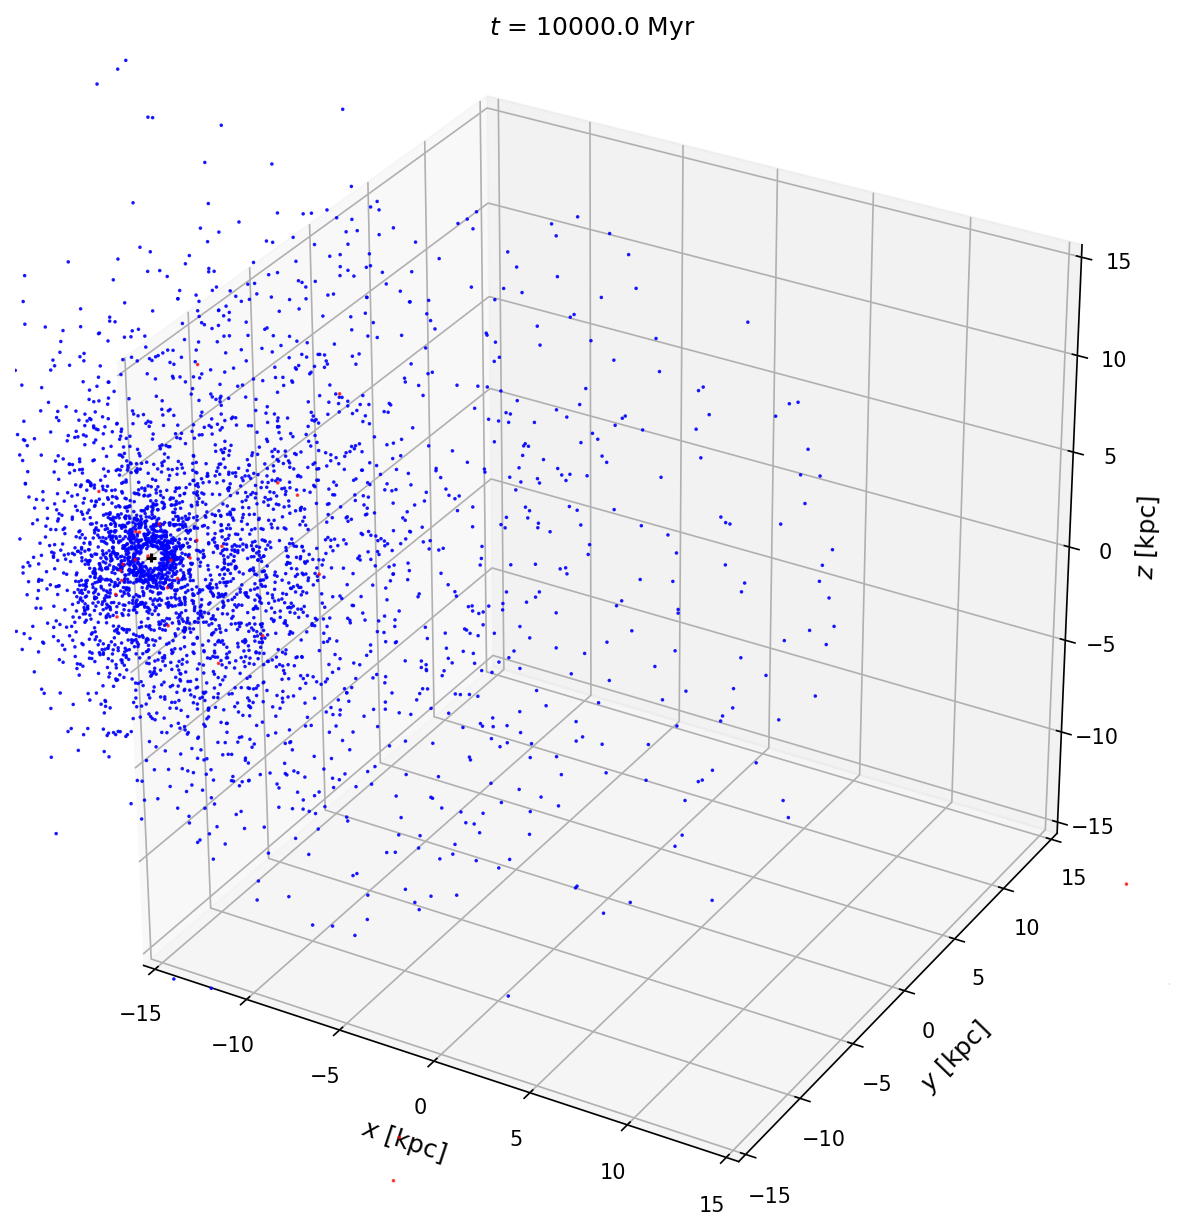

In [21]:
i = 100
galcol.show_two_disks_3d(data[i,:,:], galaxies['target']['N_stars'], 
                         [-15,15], [-15,15], [-15,15], t[i], name='two_disks')

MovieWriter ffmpeg unavailable; using Pillow instead.


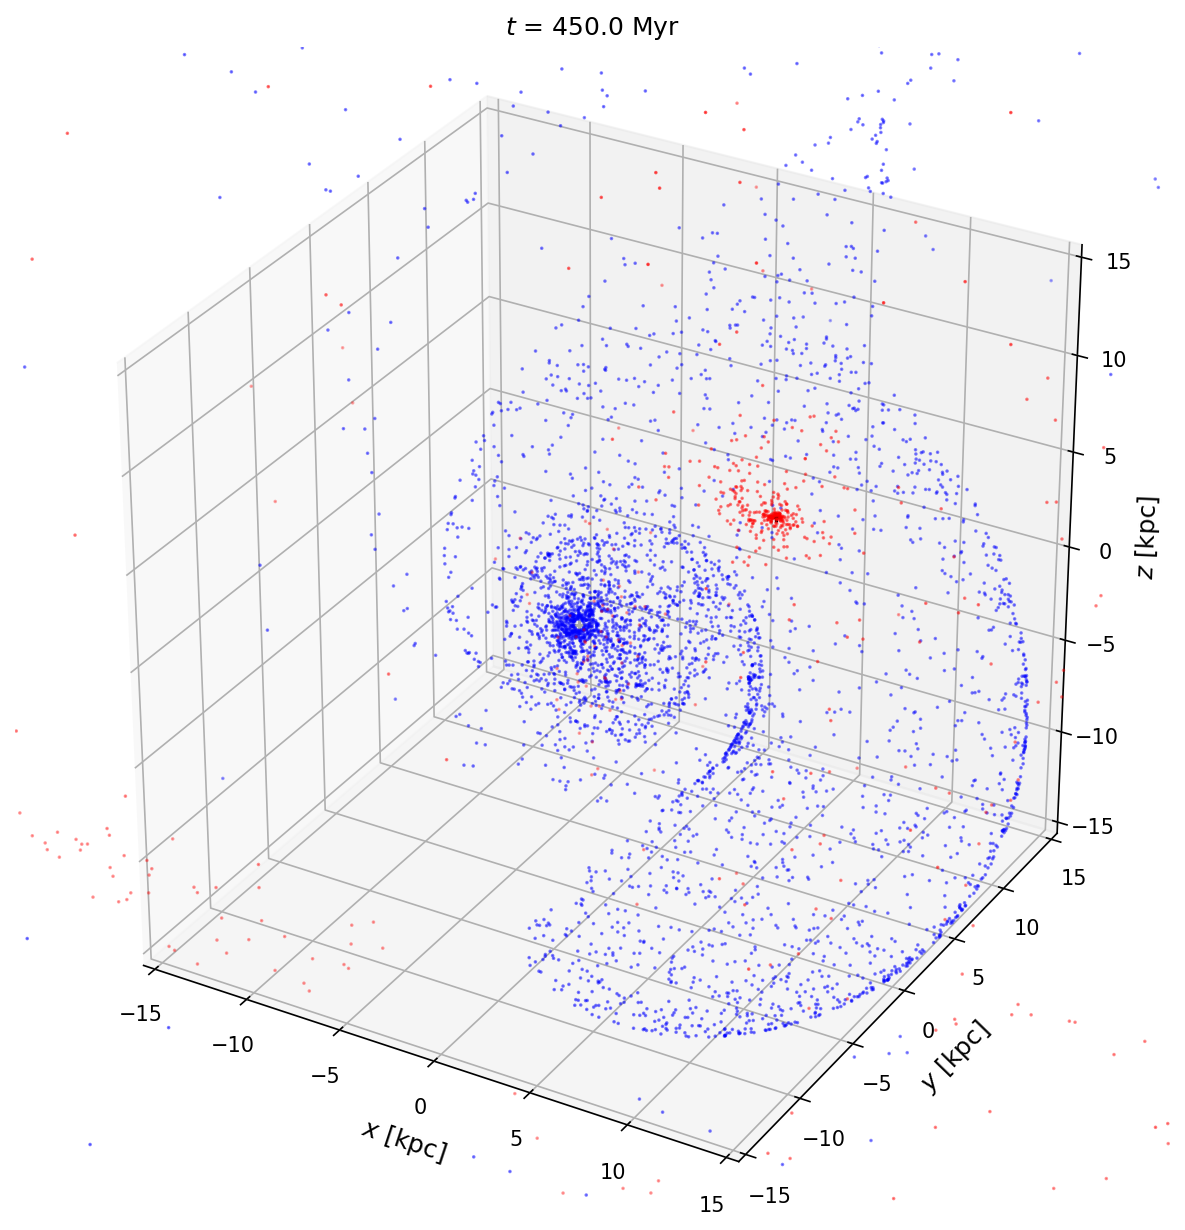

In [33]:
galcol.anim_two_disks_3d(data, galaxies['target']['N_stars'], 
                         [-15,15], [-15,15], [-15,15], t, name='two_disks')